## 1. Set up communication with the FR3

### 1.1 Set up communication with the arm

In [1]:
%load_ext autoreload
%autoreload 2
import time
from FR3Py.robot.interface import FR3Real
robot = FR3Real(robot_id='fr3')

Interface Running...


In [2]:
# Print the arm state
robot.getJointStates()

{'q': array([ 9.80236312e-04, -7.84775800e-01,  4.29309838e-03, -2.35605340e+00,
        -8.90803154e-04,  1.57135950e+00,  7.86479268e-01]),
 'dq': array([ 0.00067766,  0.00055989,  0.00116106, -0.00061268, -0.0005818 ,
         0.0003225 ,  0.00013136]),
 'T': array([-0.1355927 , -4.47656393, -0.9541229 , 23.11954117,  0.92668378,
         2.08829474, -0.0571954 ]),
 'M': array([[ 4.93205041e-01, -1.26701591e-02,  4.91497877e-01,
         -9.80305660e-03,  6.16168535e-02, -2.86850692e-03,
          1.29903366e-03],
        [-1.26701591e-02,  1.54911490e+00,  3.46245864e-03,
         -7.02425848e-01, -1.28333966e-02, -2.25175627e-02,
         -1.54606319e-03],
        [ 4.91497877e-01,  3.46245864e-03,  9.96050754e-01,
         -2.57440116e-02,  7.51627593e-02, -3.67128199e-03,
          3.25273356e-03],
        [-9.80305660e-03, -7.02425848e-01, -2.57440116e-02,
          9.73390980e-01,  2.54557507e-02,  1.11793194e-01,
         -1.76826638e-04],
        [ 6.16168535e-02, -1.2833396

### 1.2 Set up communication with the gripper

In [3]:
# from fr3_gripper import Gripper, GripperState
# gripper = Gripper("192.168.123.250")

# Initialize the gripper
# gripper.homing()

# # Print the gripper state
# gripper_state = gripper.readOnce()
# print(gripper_state)

## 2. Define robot task parameters

### 2.1 Load PinocchioModel and define various parameters

In [3]:
import numpy as np
from FR3Py.robot.model_collision_avoidance import PinocchioModel
import time

pin_robot = PinocchioModel()
joint_lb = np.array([-2.3093, -1.5133, -2.4937, -2.7478, -2.48, 0.8521, -2.6895])
joint_ub = np.array([2.3093, 1.5133, 2.4937, -0.4461, 2.48, 4.2094, 2.6895])
torque_lb = np.array([-87, -87, -87, -87, -12, -12, -12])
torque_ub = np.array([87, 87, 87, 87, 12, 12, 12])
joint_acc_lb = np.array([-10, -10, -10, -10, -10, -10, -10])
joint_acc_ub = np.array([10, 10, 10, 10, 10, 10, 10])
v_EE_lb = np.array([-0.2, -0.2, -0.2])
v_EE_ub = np.array([0.2, 0.2, 0.2])
static_friction = np.array([0.8, 2.35, 0.5, 2.35, 1.3, 1.0, 0.5])

n_joints = 7
n_controls = 7
q_bar = 0.5*(joint_ub + joint_lb)
delta_M = np.diag([0.2, 0.25, 0.25, 0.25, 0.25, 0.25, 0.2])

## 3. Load/measure some coordinates

### 3.1 Measure the corners

In [5]:
# corner_1         corner_2
#     -----------------
#     |               |
#     |               | 
#     |               |
#     |               |
#     |               |
#     |               |   x Robot base
#     -----------------
# corner_4         corner_3
# *** corner_1 is out of reach of the robot

In [6]:
# Measure corner_2
corner_2_mes = []
for i in range(20):
    robot_info = robot.getJointStates()
    q = robot_info['q'] # shape (7,)
    dq = robot_info['dq'] # shape (7,)

    q_pin = 0.30*np.ones(9)
    dq_pin = np.zeros(9)
    q_pin[0:n_joints] = q # shape (9,)
    dq_pin[0:n_joints] = dq # shape (9,)

    pin_info = pin_robot.getInfo(q_pin, dq_pin)
    P_EE = pin_info["P_EE"]

    corner_2_mes.append(P_EE.copy())
    time.sleep(0.1)

corner_2_mes = np.array(corner_2_mes)
corner_2 = np.mean(corner_2_mes, axis=0)[:2]
print("corner_2: ", corner_2)

corner_2:  [0.30590853 0.00122357]


In [7]:
# Measure corner_3
corner_3_mes = []
for i in range(20):
    robot_info = robot.getJointStates()
    q = robot_info['q'] # shape (7,)
    dq = robot_info['dq'] # shape (7,)

    q_pin = 0.30*np.ones(9)
    dq_pin = np.zeros(9)
    q_pin[0:n_joints] = q # shape (9,)
    dq_pin[0:n_joints] = dq # shape (9,)

    pin_info = pin_robot.getInfo(q_pin, dq_pin)
    P_EE = pin_info["P_EE"]

    corner_3_mes.append(P_EE.copy())
    time.sleep(0.1)

corner_3_mes = np.array(corner_3_mes)
corner_3 = np.mean(corner_3_mes, axis=0)[:2]
print("corner_3: ", corner_3)

corner_3:  [0.30590836 0.00122365]


In [8]:
# Measure corner_4
corner_4_mes = []
for i in range(20):
    robot_info = robot.getJointStates()
    q = robot_info['q'] # shape (7,)
    dq = robot_info['dq'] # shape (7,)

    q_pin = 0.30*np.ones(9)
    dq_pin = np.zeros(9)
    q_pin[0:n_joints] = q # shape (9,)
    dq_pin[0:n_joints] = dq # shape (9,)

    pin_info = pin_robot.getInfo(q_pin, dq_pin)
    P_EE = pin_info["P_EE"]

    corner_4_mes.append(P_EE.copy())
    time.sleep(0.1)

corner_4_mes = np.array(corner_4_mes)
corner_4 = np.mean(corner_4_mes, axis=0)[:2]
print("corner_4: ", corner_4)

corner_4:  [0.30590835 0.00122338]


In [9]:
# Calculate corner_1 (ignore the z coordinate)
corner_1 = corner_2 + corner_4 - corner_3
print("corner_1: ", corner_1)

corner_1:  [0.30590852 0.0012233 ]


### 3.2 Measure the polygon vertices

In [10]:
# Measure vertex_1
vertex_1_mes = []
for i in range(20):
    robot_info = robot.getJointStates()
    q = robot_info['q'] # shape (7,)
    dq = robot_info['dq'] # shape (7,)

    q_pin = 0.30*np.ones(9)
    dq_pin = np.zeros(9)
    q_pin[0:n_joints] = q # shape (9,)
    dq_pin[0:n_joints] = dq # shape (9,)

    pin_info = pin_robot.getInfo(q_pin, dq_pin)
    P_EE = pin_info["P_EE"]

    vertex_1_mes.append(P_EE.copy())
    time.sleep(0.1)

vertex_1_mes = np.array(vertex_1_mes)
vertex_1 = np.mean(vertex_1_mes, axis=0)[:2]
print("vertex_1: ", vertex_1)

vertex_1:  [0.30590816 0.00122353]


In [11]:
# Measure vertex_2
vertex_2_mes = []
for i in range(20):
    robot_info = robot.getJointStates()
    q = robot_info['q'] # shape (7,)
    dq = robot_info['dq'] # shape (7,)

    q_pin = 0.30*np.ones(9)
    dq_pin = np.zeros(9)
    q_pin[0:n_joints] = q # shape (9,)
    dq_pin[0:n_joints] = dq # shape (9,)

    pin_info = pin_robot.getInfo(q_pin, dq_pin)
    P_EE = pin_info["P_EE"]

    vertex_2_mes.append(P_EE.copy())
    time.sleep(0.1)

vertex_2_mes = np.array(vertex_2_mes)
vertex_2 = np.mean(vertex_2_mes, axis=0)[:2]
print("vertex_2: ", vertex_2)

vertex_2:  [0.30590798 0.00122356]


In [12]:
# Measure vertex_3
vertex_3_mes = []
for i in range(20):
    robot_info = robot.getJointStates()
    q = robot_info['q'] # shape (7,)
    dq = robot_info['dq'] # shape (7,)

    q_pin = 0.30*np.ones(9)
    dq_pin = np.zeros(9)
    q_pin[0:n_joints] = q # shape (9,)
    dq_pin[0:n_joints] = dq # shape (9,)

    pin_info = pin_robot.getInfo(q_pin, dq_pin)
    P_EE = pin_info["P_EE"]

    vertex_3_mes.append(P_EE.copy())
    time.sleep(0.1)

vertex_3_mes = np.array(vertex_3_mes)
vertex_3 = np.mean(vertex_3_mes, axis=0)[:2]
print("vertex_3: ", vertex_3)

vertex_3:  [0.30590783 0.00122364]


In [13]:
# Measure vertex_4
vertex_4_mes = []
for i in range(20):
    robot_info = robot.getJointStates()
    q = robot_info['q'] # shape (7,)
    dq = robot_info['dq'] # shape (7,)

    q_pin = 0.30*np.ones(9)
    dq_pin = np.zeros(9)
    q_pin[0:n_joints] = q # shape (9,)
    dq_pin[0:n_joints] = dq # shape (9,)

    pin_info = pin_robot.getInfo(q_pin, dq_pin)
    P_EE = pin_info["P_EE"]

    vertex_4_mes.append(P_EE.copy())
    time.sleep(0.1)

vertex_4_mes = np.array(vertex_4_mes)
vertex_4 = np.mean(vertex_4_mes, axis=0)[:2]
print("vertex_4: ", vertex_4)

vertex_4:  [0.30590763 0.00122402]


### 3.3 Save the measured coordinates

In [14]:
# Save the corners in a json file
import json
corners = {"corner_1": corner_1.tolist(),
           "corner_2": corner_2.tolist(),
           "corner_3": corner_3.tolist(),
           "corner_4": corner_4.tolist(),
           "vertex_1": vertex_1.tolist(),
           "vertex_2": vertex_2.tolist(),
           "vertex_3": vertex_3.tolist(),
           "vertex_4": vertex_4.tolist()
           }
with open("exp2_coordinates.json", "w") as f:
    json.dump(corners, f, indent=4)

### 3.4 Directly load the pre-saved corners

In [4]:
import json
with open("exp2_coordinates.json", "r") as f:
    coordinates = json.load(f)
    corner_1 = np.array(coordinates["corner_1"])
    corner_2 = np.array(coordinates["corner_2"])
    corner_3 = np.array(coordinates["corner_3"])
    corner_4 = np.array(coordinates["corner_4"])
    vertex_1 = np.array(coordinates["vertex_1"])
    vertex_2 = np.array(coordinates["vertex_2"])
    vertex_3 = np.array(coordinates["vertex_3"])
    vertex_4 = np.array(coordinates["vertex_4"])

### 3.5 Visualize the coordinates

(0.8615622955, 0.2372998545, -0.2890539025, 0.6750019925)

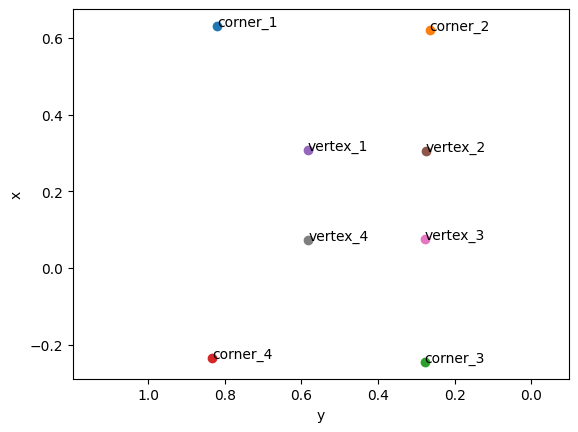

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure()

plt.plot(corner_1[1], corner_1[0], 'o')
plt.text(corner_1[1], corner_1[0], 'corner_1')

plt.plot(corner_2[1], corner_2[0], 'o')
plt.text(corner_2[1], corner_2[0], 'corner_2')

plt.plot(corner_3[1], corner_3[0], 'o')
plt.text(corner_3[1], corner_3[0], 'corner_3')

plt.plot(corner_4[1], corner_4[0], 'o')
plt.text(corner_4[1], corner_4[0], 'corner_4')

plt.plot(vertex_1[1], vertex_1[0], 'o')
plt.text(vertex_1[1], vertex_1[0], 'vertex_1')

plt.plot(vertex_2[1], vertex_2[0], 'o')
plt.text(vertex_2[1], vertex_2[0], 'vertex_2')

plt.plot(vertex_3[1], vertex_3[0], 'o')
plt.text(vertex_3[1], vertex_3[0], 'vertex_3')

plt.plot(vertex_4[1], vertex_4[0], 'o')
plt.text(vertex_4[1], vertex_4[0], 'vertex_4')

# Invert the x-axis (make it go left)
plt.gca().invert_xaxis()
plt.xlabel('y')
plt.ylabel('x')
plt.axis('equal')

# 

## 3.6 Together with trajectory

(0.8615622955, 0.2372998545, -0.2890539025, 0.6750019925)

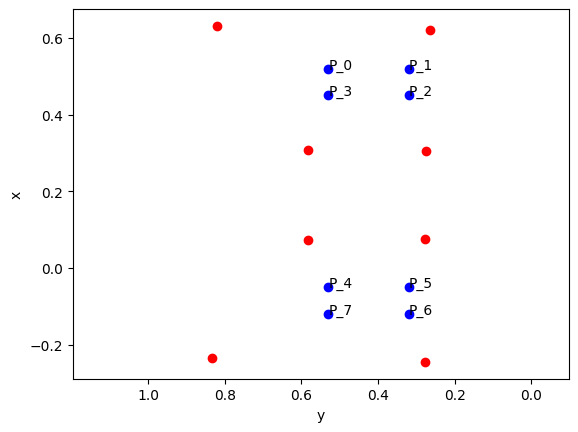

In [7]:
traj = np.array([[0.52, 0.53],
                 [0.52, 0.32],
                 [0.45, 0.32],
                 [0.45, 0.53],
                 [-0.05, 0.53],
                 [-0.05, 0.32],
                 [-0.12, 0.32],
                 [-0.12, 0.53]
                 ])

fig, ax = plt.subplots()

ax.plot(corner_1[1], corner_1[0], 'o', color='red')
ax.plot(corner_2[1], corner_2[0], 'o', color='red')
ax.plot(corner_3[1], corner_3[0], 'o', color='red')
ax.plot(corner_4[1], corner_4[0], 'o', color='red')

ax.plot(vertex_1[1], vertex_1[0], 'o', color='red')
ax.plot(vertex_2[1], vertex_2[0], 'o', color='red')
ax.plot(vertex_3[1], vertex_3[0], 'o', color='red')
ax.plot(vertex_4[1], vertex_4[0], 'o', color='red')

for i in range(traj.shape[0]):
    ax.plot(traj[i, 1], traj[i, 0], 'o', color='blue')
    plt.text(traj[i, 1], traj[i, 0], 'P_{}'.format(i))

# Invert the x-axis (make it go left)
ax.invert_xaxis()
ax.set_xlabel('y')
ax.set_ylabel('x')
ax.axis('equal')

## 4. Define Obstacles and CBFs

In [8]:
# Obstacle parameters
obstacle_config = {
    "obs1":{
        "type": "polytope2d",
        "vertices": [vertex_1.tolist(), vertex_2.tolist(), vertex_3.tolist(), vertex_4.tolist()],
        "pos": [0.0, 0.0],
        "theta": 0.0
    }
}

# corners
corners_2d = np.array([corner_1, corner_2, corner_3, corner_4])

In [9]:
from cores.utils.bounding_shape_coef_mj import BoundingShapeCoef
from cores.obstacle_collections.polytope_collection import PolytopeCollection
import scalingFunctionsHelperPy as sfh
import HOCBFHelperPy as hh
from scipy.spatial.transform import Rotation
import multiprocessing
from liegroups import SO3
from cores.utils.osqp_utils import init_osqp
from cores.utils.rotation_utils import get_quat_from_rot_matrix
from cores.utils.utils import get_facial_equations
import scipy.sparse as sparse

# Robot part
robot_SFs = []
eraser_bb_size_2d = np.array([0.088, 0.035])
ellipsoid_quadratic_coef_2d = np.diag(1/eraser_bb_size_2d**2)
SF_rob = sfh.Ellipsoid2d(True, ellipsoid_quadratic_coef_2d, np.zeros(2))
robot_SFs.append(SF_rob)

# Hyperplane
hyperplane_SFs = []
A_tmp, b_tmp = get_facial_equations(corners_2d) # need to inverse the sign
for i in range(A_tmp.shape[0]):
    hyperplane_SFs.append(sfh.Hyperplane2d(False, -A_tmp[i], -b_tmp[i]))
n_hyperplane = len(hyperplane_SFs)

# Polytopes
n_polytope = len(obstacle_config)
obs_col = PolytopeCollection(2, n_polytope, obstacle_config)
obstacle_kappa = 80.0
polytope_SFs = []
for (i, obs_key) in enumerate(obs_col.face_equations.keys()):
    A_obs_np = obs_col.face_equations[obs_key]["A"]
    b_obs_np = obs_col.face_equations[obs_key]["b"]
    obs_kappa = obstacle_kappa
    SF_obs = sfh.LogSumExp2d(False, A_obs_np, b_obs_np, obs_kappa)
    polytope_SFs.append(SF_obs)

# Define problems
n_threads = min(max(multiprocessing.cpu_count() -1, 1), 5)
probs = hh.Problem2dCollection(n_threads)
# Save the corners in a json file
import json
corners = {"corner_1": corner_1.tolist(),
           "corner_2": corner_2.tolist(),
           "corner_3": corner_3.tolist(),
           "corner_4": corner_4.tolist(),
           "vertex_1": vertex_1.tolist(),
           "vertex_2": vertex_2.tolist(),
           "vertex_3": vertex_3.tolist(),
           "vertex_4": vertex_4.tolist()
           }
with open("exp2_coordinates.json", "w") as f:
    json.dump(corners, f, indent=4)
for i in range(len(robot_SFs)):
    SF_rob = robot_SFs[i]
    frame_id = i
    for (j, obs_key) in enumerate(obs_col.face_equations.keys()):
        SF_obs = polytope_SFs[j]
        vertices = obs_col.face_equations[obs_key]["vertices_in_world"]
        prob = hh.EllipsoidAndLogSumExp2dPrb(SF_rob, SF_obs, vertices)
        probs.addProblem(prob, frame_id)

    for j in range(len(hyperplane_SFs)):
        SF_obs = hyperplane_SFs[j]
        prob = hh.EllipsoidAndHyperplane2dPrb(SF_rob, SF_obs)
        probs.addProblem(prob, frame_id)


/workspaces/HOCBF-FR3-Experiments/cores/utils/utils.py:101: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(dist_matrix, method='single')
/workspaces/HOCBF-FR3-Experiments/cores/obstacle_collections/polytope_collection.py:13: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(dist_matrix, method='single')


## 5. Control the arm to pre-cleaning pose

In [10]:
# Define tracking gains
K_p_pos = np.diag([100,100,100])*0.9
K_d_pos = np.diag([50,50,50])*0.5

K_p_rot = np.diag([200,200,200])*1.8
K_d_rot = np.diag([100,100,100])*0.4

Kp_joint = 20*np.diag([1, 1, 1, 1, 1, 1, 1])
Kd_joint = 10*np.diag([1, 1, 1, 1, 1, 1, 1])

In [11]:
from cores.utils.trajectory_utils import PositionTrapezoidalTrajectory, OrientationTrapezoidalTrajectory
t_final = 6

# Get current pose
robot_info = robot.getJointStates()
q = robot_info['q'] # shape (7,)
dq = robot_info['dq'] # shape (7,)

q_pin = 0.30*np.ones(9)
dq_pin = np.zeros(9)
q_pin[0:n_joints] = q # shape (9,)
dq_pin[0:n_joints] = dq # shape (9,)

pin_info = pin_robot.getInfo(q_pin, dq_pin)
P_EE = pin_info["P_EE"]
R_EE = pin_info["R_EE"]

# Translational trajectory
P_EE_start = P_EE.copy()
P_EE_pre_cleaning = np.zeros(3)
P_EE_pre_cleaning[:2] = traj[0,:]
P_EE_pre_cleaning[2] = 0.02

via_points = np.array([P_EE_start, P_EE_pre_cleaning])
target_time = np.array([0, t_final])
Ts = 0.01
traj_position = PositionTrapezoidalTrajectory(via_points, target_time, T_antp=0.2, Ts=Ts)

# Rotational trajectory
R_EE_start  = R_EE.copy()

roll = np.pi
pitch = 0
yaw = 0
R_EE_pre_grasping = Rotation.from_euler('xyz', [roll, pitch, yaw]).as_matrix()

orientations = np.array([R_EE_start, R_EE_pre_grasping])
target_time = np.array([0, t_final])
traj_orientation = OrientationTrapezoidalTrajectory(orientations, target_time, Ts=Ts)

t_start = time.time()
while time.time() - t_start < t_final + 1:
    t_loop_start = time.time()
    t = time.time() - t_start
    traj_pos, traj_pos_dt, traj_pos_dtdt = traj_position.get_traj_and_ders(t)
    traj_ori, traj_ori_dt, traj_ori_dtdt = traj_orientation.get_traj_and_ders(t)

    robot_info = robot.getJointStates()
    q = robot_info['q'] # shape (7,)
    dq = robot_info['dq'] # shape (7,)
    M = robot_info['M'] + delta_M # shape (7,7)
    G = robot_info['G'] # shape (7,)
    Coriolis = robot_info['C'] # shape (7,)

    q_pin = 0.025*np.ones(9)
    dq_pin = np.zeros(9)
    q_pin[0:n_joints] = q # shape (9,)
    dq_pin[0:n_joints] = dq # shape (9,)

    pin_info = pin_robot.getInfo(q_pin, dq_pin)

    P_EE = pin_info["P_EE"]
    R_EE = pin_info["R_EE"]
    J_EE = pin_info["J_EE"][:,0:n_joints] # shape (6,7)
    dJdq_EE = pin_info["dJdq_EE"] # shape (6,)
    v_EE = J_EE @ dq # shape (6,)2

    # Primary obejctive: tracking control
    e_pos = P_EE - traj_pos # shape (3,)
    e_pos_dt = v_EE[:3] - traj_pos_dt # shape (3,)
    v_dt = traj_pos_dtdt - K_p_pos @ e_pos - K_d_pos @ e_pos_dt

    e_rot = SO3(R_EE @ traj_ori.T).log() # shape (3,)
    e_rot_dt = v_EE[3:] - traj_ori_dt # shape (3,)
    omega_dt = traj_ori_dtdt -K_p_rot @ e_rot - K_d_rot @ e_rot_dt

    v_EE_dt_desired = np.concatenate([v_dt, omega_dt])
    S = J_EE
    S_pinv = S.T @ np.linalg.pinv(S @ S.T + 0.01* np.eye(S.shape[0]))
    S_null = (np.eye(len(q)) - S_pinv @ S)
    ddq_task = S_pinv @ (v_EE_dt_desired - dJdq_EE)

    # Secondary objective: encourage the joints to remain close to the initial configuration
    W = np.diag(1.0/(joint_ub-joint_lb))
    q_bar = 1/2*(joint_ub+joint_lb)
    e_joint = W @ (q - q_bar)
    e_joint_dot = W @ dq
    ddq = ddq_task + S_null @ (- Kp_joint @ e_joint - Kd_joint @ e_joint_dot)

    # tau = M_pin @ ddq + nle_pin - G_pin + static_friction * np.tanh(dq_moving_avg)
    tau = M @ ddq + Coriolis + static_friction * np.tanh(dq)

    tau = np.clip(tau, -30, 30)
    robot.setCommands(tau)


robot.setCommands(np.zeros_like(tau))


## 6. Clean the whiteboard

In [12]:
# Define CBF-QP
n_vars = 3
n_obstacle = n_polytope + n_hyperplane
n_robot = len(robot_SFs)
n_CBF = n_robot*n_obstacle
n_in = n_CBF + 2 + 2
cbf_qp = init_osqp(n_v=n_vars, n_in=n_in)

# Define parameters
F_press = np.array([0, 0, -10, 0, 0, 0])
z_vel_damping = 1.0
mu_coulomb = 0.3 # 0.305
mu_static = 1.0
alpha0 = 1.03
gamma1 = 10
gamma2 = 10
compensation = 0
a_EE_lb = np.array([-5.0, -5.0, -5.0])
a_EE_ub = np.array([5.0, 5.0, 5.0])

# Define tracking gains
K_p_pos = np.diag([100,100,100])*0.9
K_d_pos = np.diag([50,50,50])*0.5

K_p_rot = np.diag([200,200,200])*1.8
K_d_rot = np.diag([15,15,40])

Kp_joint = 20*np.diag([1, 1, 1, 1, 1, 1, 1])
Kd_joint = 10*np.diag([1, 1, 1, 1, 1, 1, 1])

# Define the record
tau_list = []
all_h_list = []
time_per_loop_list = []
P_EE_list = []
P_EE_d_list = []
theta_2d_list = []

In [13]:
def fric_fun(Fz_abs, v_2d, a_2d, mu_coulomb, mu_static):
    v_norm = np.linalg.norm(v_2d)
    v_dir = v_2d/v_norm
    a_norm = np.linalg.norm(a_2d)
    a_dir = a_2d/a_norm

    F_coulomb = mu_coulomb * Fz_abs * v_dir * np.tanh(200*v_norm) 
    F_static = mu_static * Fz_abs * a_dir * (1-np.tanh(200*v_norm)) * np.tanh(5*a_norm)
    # if v_norm < 0.015 and a_norm < 0.01:
    #     return np.zeros(2)
    return F_coulomb + F_static

In [14]:
t_1 = 1
t_2 = 3.5
t_3 = 4.5
t_4 = 7.0
t_5 = 15.0
t_6 = 17.5
t_7 = 18.5
t_final = 21.0

# Get current pose
robot_info = robot.getJointStates()
q = robot_info['q'] # shape (7,)
dq = robot_info['dq'] # shape (7,)

q_pin = 0.30*np.ones(9)
dq_pin = np.zeros(9)
q_pin[0:n_joints] = q # shape (9,)
dq_pin[0:n_joints] = dq # shape (9,)

pin_info = pin_robot.getInfo(q_pin, dq_pin)
P_EE = pin_info["P_EE"]
R_EE = pin_info["R_EE"]

# Translational trajectoryt_1
P_EE_start = P_EE.copy()
via_points = np.zeros([len(traj)+1, 3])
via_points[0] = P_EE_start
for i in range(len(traj)):
    via_points[i+1, :2] = traj[i]
    via_points[i+1, 2] = 0.019
target_time = np.array([0, t_1, t_2, t_3, t_4, t_5, t_6, t_7, t_final])
assert len(via_points) == len(target_time)
Ts = 0.01
traj_position = PositionTrapezoidalTrajectory(via_points, target_time, T_antp=0.2, Ts=Ts)

# Rotational trajectory
R_EE_start  = R_EE.copy()

roll = np.pi
pitch = 0
yaw = 0
R_EE_cleaning = Rotation.from_euler('xyz', [roll, pitch, yaw]).as_matrix()

orientations = np.array([R_EE_start, R_EE_cleaning, R_EE_cleaning])
target_time = np.array([0, t_1, t_final])
traj_orientation = OrientationTrapezoidalTrajectory(orientations, target_time, Ts=Ts)

# Get tau_ext init
robot_info = robot.getJointStates()
tau_m = robot_info['T']
G = robot_info['G']
tau_ext_init = tau_m - G

t_start = time.time()
while time.time() - t_start < t_final + 1:
    time_loop_start = time.time()
    t = time.time() - t_start
    traj_pos, traj_pos_dt, traj_pos_dtdt = traj_position.get_traj_and_ders(t)
    traj_ori, traj_ori_dt, traj_ori_dtdt = traj_orientation.get_traj_and_ders(t)

    robot_info = robot.getJointStates()
    q = robot_info['q'] # shape (7,)
    dq = robot_info['dq'] # shape (7,)
    M = robot_info['M'] + delta_M # shape (7,7)
    G = robot_info['G'] # shape (7,)
    Coriolis = robot_info['C'] # shape (7,)
    tau_m = robot_info['T'] # shape (7,)
    tau_ext = tau_m - G - tau_ext_init

    q_pin = 0.025*np.ones(9)
    dq_pin = np.zeros(9)
    q_pin[0:n_joints] = q # shape (9,)
    dq_pin[0:n_joints] = dq # shape (9,)

    pin_info = pin_robot.getInfo(q_pin, dq_pin)

    P_EE = pin_info["P_EE"]
    R_EE = pin_info["R_EE"]
    J_EE = pin_info["J_EE"][:,0:n_joints] # shape (6,7)
    dJdq_EE = pin_info["dJdq_EE"] # shape (6,)
    v_EE = J_EE @ dq # shape (6,)

    # Primary obejctive: tracking control
    e_pos = P_EE - traj_pos # shape (3,)
    e_pos_dt = v_EE[:3] - traj_pos_dt # shape (3,)
    v_dt = traj_pos_dtdt - K_p_pos @ e_pos - K_d_pos @ e_pos_dt

    e_rot = SO3(R_EE @ traj_ori.T).log() # shape (3,)
    e_rot_dt = v_EE[3:] - traj_ori_dt # shape (3,)
    omega_dt = traj_ori_dtdt -K_p_rot @ e_rot - K_d_rot @ e_rot_dt

    v_EE_dt_desired = np.concatenate([v_dt, omega_dt])

    theta_2d = np.arctan2(R_EE[1,0], R_EE[0,0])

    # CBF-QP
    C = np.zeros((n_in, n_vars))
    lb = np.zeros(n_in)
    ub = np.zeros(n_in)

    CBF_tmp = np.zeros(n_CBF)
    phi1_tmp = np.zeros(n_CBF)
    phi2_tmp = np.zeros(n_CBF)

    all_P_np = np.zeros([1, 3])
    all_theta_np = np.zeros([1])
    all_dx = np.zeros([1, 3])

    all_P_np[0] = P_EE.copy()
    all_theta_np[0] = theta_2d
    all_dx[0,:] = v_EE[[0,1,5]]

    all_h_np, all_h_dx, all_h_dxdx, all_phi1_np, all_actuation_np, all_lb_np, all_ub_np = \
        probs.getCBFConstraints(all_P_np, all_theta_np, all_dx, alpha0, gamma1, gamma2, compensation)

    # CBF-QP constraints
    C[0:n_CBF,:] = all_actuation_np
    lb[0:n_CBF] = all_lb_np
    ub[0:n_CBF] = all_ub_np

    h_v_lb = v_EE[0:2] - v_EE_lb[0:2]
    h_v_ub = v_EE_ub[0:2] - v_EE[0:2]
    C[n_CBF:n_CBF+2, :] = np.eye(2, 3)
    lb[n_CBF:n_CBF+2] = -20*h_v_lb
    ub[n_CBF:n_CBF+2] = 20*h_v_ub

    C[n_CBF+2:n_CBF+4, :] = np.eye(2, 3)
    lb[n_CBF+2:n_CBF+4] = a_EE_lb[0:2]
    ub[n_CBF+2:n_CBF+4] = a_EE_ub[0:2]
    
    g = -v_EE_dt_desired[[0,1,5]]

    data = C.flatten()
    rows, cols = np.indices(C.shape)
    row_indices = rows.flatten()
    col_indices = cols.flatten()
    Ax = sparse.csc_matrix((data, (row_indices, col_indices)), shape=C.shape)
    cbf_qp.update(q=g, l=lb, u=ub, Ax=Ax.data)
    results = cbf_qp.solve()
    dx_safe = results.x

    v_EE_dt = v_EE_dt_desired.copy()
    v_EE_dt[[0,1,5]] = dx_safe.copy()
    
    S = J_EE
    S_pinv = S.T @ np.linalg.pinv(S @ S.T + 0.00* np.eye(S.shape[0]))
    S_null = (np.eye(len(q)) - S_pinv @ S)
    ddq_task = S_pinv @ (v_EE_dt - dJdq_EE)

    # Secondary objective: encourage the joints to remain close to the initial configuration
    W = np.diag(1.0/(joint_ub-joint_lb))
    q_bar = 1/2*(joint_ub+joint_lb)
    e_joint = W @ (q - q_bar)
    e_joint_dot = W @ dq
    ddq = ddq_task + S_null @ (- Kp_joint @ e_joint - Kd_joint @ e_joint_dot)

    # Other objective 1: apply a force on the z axis to press the end-effector against the table
    F_press_feedback = F_press.copy()
    F_press_feedback[2] += -z_vel_damping * v_EE[2]
    tau_press = J_EE.T @ F_press

    # Other objective 2: apply a force to compensate for the friction
    F_ext = np.linalg.pinv(J_EE.T) @ tau_ext
    z_force = F_ext[2]
    F_friction = np.zeros(6)
    if z_force < 0:
        F_friction[0:2] = fric_fun(np.abs(z_force), v_EE[0:2], v_EE_dt[0:2], mu_coulomb, mu_static)
    tau_friction = J_EE.T @ F_friction

    tau = M @ ddq + Coriolis + static_friction * np.tanh(dq) + tau_friction + tau_press

    tau = np.clip(tau, -30, 30)
    robot.setCommands(tau)
    time_loop_end = time.time()

    tau_list.append(tau.copy())
    all_h_list.append(all_h_np.copy())
    time_per_loop_list.append(time_loop_end - time_loop_start)
    P_EE_list.append(P_EE.copy())
    P_EE_d_list.append(traj_pos.copy())
    theta_2d_list.append(theta_2d)


robot.setCommands(np.zeros_like(tau))

## 7. Save the data

In [15]:
import pickle
from datetime import datetime
import os

now = datetime.now()
formatted_date_time = now.strftime("%Y-%m-%d-%H-%M-%S")

directory = f"exp2_results/no_circ_{formatted_date_time}"

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Define the file path
file_path = os.path.join(directory, "data.pickle")

# Data to be saved
data = {
    "tau": tau_list,
    "all_h": all_h_list,
    "time_per_loop": time_per_loop_list,
    "P_EE": P_EE_list,
    "P_EE_d": P_EE_d_list,
    "theta_2d_list": theta_2d_list
}

# Save the data using pickle
with open(file_path, "wb") as f:
    pickle.dump(data, f)


## 8. Visualize the trajectory

(0.8615622955, 0.2372998545, -0.2890539025, 0.6750019925)

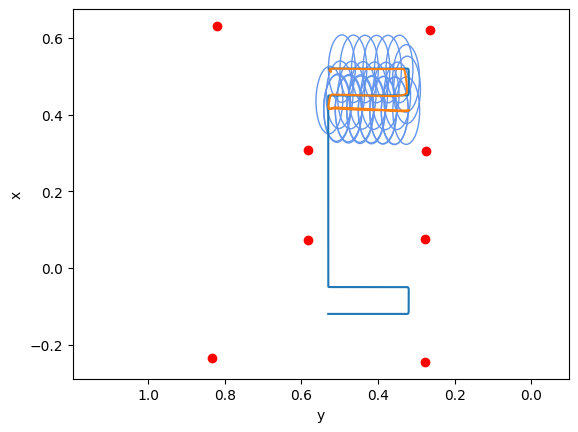

In [16]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

fig, ax = plt.subplots()

ax.plot(corner_1[1], corner_1[0], 'o', color='red')
ax.plot(corner_2[1], corner_2[0], 'o', color='red')
ax.plot(corner_3[1], corner_3[0], 'o', color='red')
ax.plot(corner_4[1], corner_4[0], 'o', color='red')

ax.plot(vertex_1[1], vertex_1[0], 'o', color='red')
ax.plot(vertex_2[1], vertex_2[0], 'o', color='red')
ax.plot(vertex_3[1], vertex_3[0], 'o', color='red')
ax.plot(vertex_4[1], vertex_4[0], 'o', color='red')

P_EE_list = np.array(P_EE_list)
P_EE_d_list = np.array(P_EE_d_list)
theta_2d_list = np.array(theta_2d_list)

ax.plot(P_EE_d_list[:,1], P_EE_d_list[:,0])
ax.plot(P_EE_list[:,1], P_EE_list[:,0])

threshold = 0.03
pos_2d_prev = P_EE_list[0,:2]
for i in range(len(P_EE_list)):
    pos_2d = P_EE_list[i,0:2]
    if np.linalg.norm(pos_2d - pos_2d_prev) >= threshold:
        angle = np.rad2deg(theta_2d_list[i] + np.pi/2)
        ellipse = Ellipse(xy=(pos_2d[1],pos_2d[0]), width=2*eraser_bb_size_2d[0], height=2*eraser_bb_size_2d[1],
                        angle=angle,edgecolor='cornflowerblue', facecolor='none')
        ax.add_patch(ellipse)
        pos_2d_prev = pos_2d

# Invert the x-axis (make it go left)
ax.invert_xaxis()
ax.set_xlabel('y')
ax.set_ylabel('x')
ax.axis('equal')

-0.06395740374624814


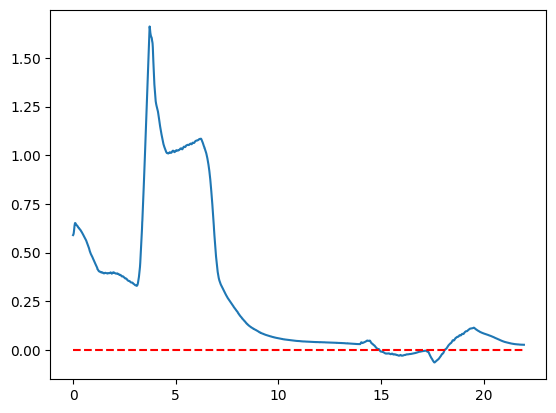

In [17]:
times = np.cumsum(time_per_loop_list)
all_h_list = np.array(all_h_list)
plt.plot(times, np.min(all_h_list, axis=1))
plt.hlines(0, 0, times[-1], colors='r', linestyles='dashed')
print(np.min(all_h_list))

843.1466840260666


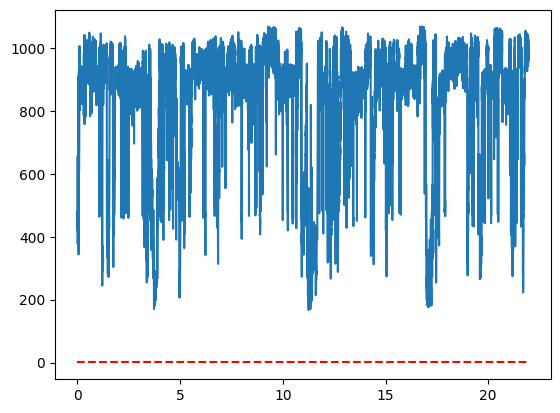

In [18]:
times = np.cumsum(time_per_loop_list)
time_per_loop_list = np.array(time_per_loop_list)
plt.plot(times, 1/time_per_loop_list)
plt.hlines(0.1, 0, times[-1], colors='r', linestyles='dashed')
print(1/np.mean(time_per_loop_list))